In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [33]:
train_df = pd.read_csv("train.csv")
from sklearn.model_selection import train_test_split, KFold
x_names = train_df.columns.values[1:-1]
y_name = train_df.columns.values[-1]
data = train_df[x_names]
target = train_df[y_name]

array([415.77879842, 441.58548931, 470.49279137, 398.50916056,
       415.89004326, 455.7290824 , 418.23471093, 392.03596947,
       421.13948163, 412.22923969])

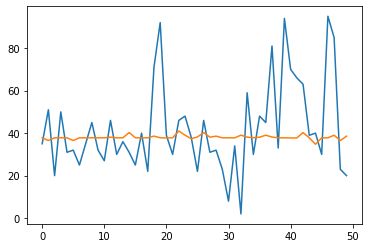

In [43]:
from sklearn.linear_model import LinearRegression
fold_num = 10
mse_linear = np.zeros(fold_num, dtype=float)
kf = KFold(n_splits=fold_num)
i = 0
for train_index, test_index in kf.split(data):
    train_x, train_y = data.iloc[train_index], target.iloc[train_index]
    test_x, test_y = data.iloc[test_index], target.iloc[test_index]

    model = LinearRegression()
    model.fit(train_x, train_y)
    predict_y = model.predict(test_x)
    mse_linear[i] = mean_squared_error(test_y, predict_y)
    i += 1

model = LinearRegression()
model.fit(data, target)
predict_data = model.predict(data)
test_n = 50
random_index = np.random.randint(0, len(predict_data), test_n)

show_predict = np.array([predict_data[i] for i in random_index])
show_real = np.array([target[i] for i in random_index])
plt.plot(range(test_n), show_real)
plt.plot(range(test_n), show_predict)
plt.show()

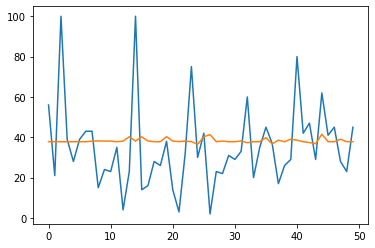

In [49]:
from sklearn.linear_model import RidgeCV
model = RidgeCV(alphas=np.linspace(0.01, 0.99, 10),
                cv=10)
model.fit(data, target)
predict_data  = model.predict(data)
test_n = 50
random_index = np.random.randint(0, len(predict_data), test_n)

show_predict = np.array([predict_data[i] for i in random_index])
show_real = np.array([target[i] for i in random_index])
plt.plot(range(test_n), show_real)
plt.plot(range(test_n), show_predict)
plt.show()


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

import ssl



transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


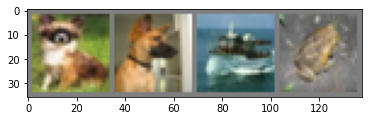

  dog   dog  ship  frog


In [59]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [60]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [62]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [63]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.205
[1,  4000] loss: 1.827
[1,  6000] loss: 1.691
[1,  8000] loss: 1.601
[1, 10000] loss: 1.516
[1, 12000] loss: 1.482
[2,  2000] loss: 1.397
[2,  4000] loss: 1.396
[2,  6000] loss: 1.342
[2,  8000] loss: 1.319
[2, 10000] loss: 1.294
[2, 12000] loss: 1.276
Finished Training


In [66]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

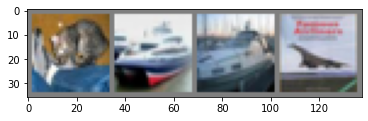

GroundTruth:    cat  ship  ship plane


In [67]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [68]:
outputs = net(images)

In [69]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


Predicted:    cat  ship  ship  ship


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [4]:
print(torch.version.cuda)

11.1
